In [9]:
from hydipy.Discrete import DiscreteNode
from hydipy.DynamicDiscretization import Hybrid_BN, DynamicDiscretization
from hydipy.ParameterLearning import CPTLearner
import pandas as pd
import numpy as np

# MLE Learning

hydipy currently supports learning of discrete nodes only. 

## Data

In [2]:
train_data = pd.DataFrame(
    {"a": ["a1", "a2", "a1","a1","a1"], "b": ["b1", "b1", "b2","b2","b1"], "c": ["c2", "c2", "c1","c1","c2"]},
)
train_data.head()

,a,b,c
0,a1,b1,c2
1,a2,b1,c2
2,a1,b2,c1
3,a1,b2,c1
4,a1,b1,c2


# BN

In [16]:
a = DiscreteNode(id="a", values=[[0.5], [0.5]], parents=[], states=["a1", "a2"])
b = DiscreteNode(id="b", values=[[0.5], [0.5]], parents=[], states=["b1", "b2"])
c = DiscreteNode(
    id="c",
    values=[[0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5]],
    parents=["a", "b"],
    states=["c1", "c2"],
)
model = Hybrid_BN([a, b, c])

## MLE Learner

In [17]:
learner = CPTLearner(model, train_data, correction=0.05)
new_cpts = learner.mle()
new_cpts

{'a': <hydipy.Discrete.DiscreteNode at 0x7fa362f5ed30>,
 'b': <hydipy.Discrete.DiscreteNode at 0x7fa362f5efa0>,
 'c': <hydipy.Discrete.DiscreteNode at 0x7fa36b0bfd00>}

In [18]:
new_bn = Hybrid_BN(new_cpts.values())

***** Variable: a ******


  a                |
a1       |a2       |
---------|---------|
 0.8730  | 0.1270  |

***** Variable: b ******


  b                |
b1       |b2       |
---------|---------|
 0.0457  | 0.9543  |

***** Variable: c ******


  c                |
c1       |c2       |
---------|---------|
 1.0000  | 0.0000  |



/home/byet/Documents/dd/hydipy/DynamicDiscretization.py:134: UserWarning: No Continuous or Mixture nodes available in this model.
  warnings.warn("No Continuous or Mixture nodes available in this model.")


<pyAgrum.pyAgrum.LazyPropagation; proxy of <Swig Object of type 'gum::LazyPropagation< double > *' at 0x7fa362fd4cf0> >

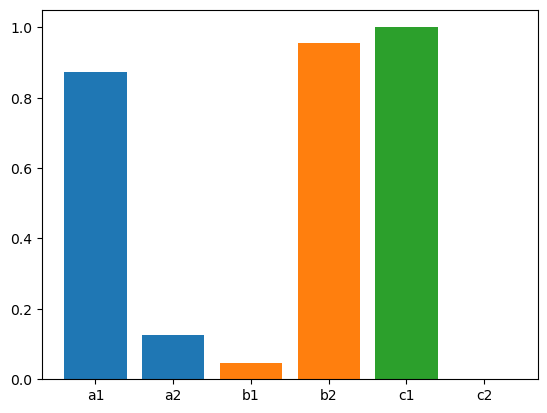

In [19]:
dd = DynamicDiscretization(new_bn)

dd.query(['a','b','c'],{'c':'c1'},  show_stats=True, show_figures=True)